In [1]:
from fastbook import *

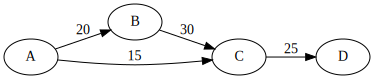

In [2]:
gv('''
A->B[label=20]
B->C[label=30]
A->C[label=15]
C->D[label=25]
''')

In [3]:
g = {}
g['a'] = [('b', 20), ('c', 15)]
g['b'] = [('c', 30)]
g['c'] = [('d', 25)]
g['d'] = []

for r in g.items():
    print(r)

('a', [('b', 20), ('c', 15)])
('b', [('c', 30)])
('c', [('d', 25)])
('d', [])


In [4]:
edges = []
for u in g.keys():
    for v, weight in g[u]:
        edges.append((u, v, weight))
for row in edges:
    print(row)

('a', 'b', 20)
('a', 'c', 15)
('b', 'c', 30)
('c', 'd', 25)


In [5]:
sorted(edges, key=lambda x: x[2])

[('a', 'c', 15), ('a', 'b', 20), ('c', 'd', 25), ('b', 'c', 30)]

In [6]:
arr_idx = {}
for i, u in enumerate(g.keys()):
    arr_idx[u] = i
arr_idx

{'a': 0, 'b': 1, 'c': 2, 'd': 3}

In [7]:
arr = [None] * len(g.keys())
for i in range(len(g.keys())):
    arr[i] = i
arr

[0, 1, 2, 3]

In [8]:
class UnionFind:
    
    def __init__(self, n: int):
        self.arr = [i for i in range(n)]
        self.ranks = [1 for i in range(n)]
        
    def find(self, x):
        while x != self.arr[x]:
            self.arr[x] = self.arr[self.arr[x]]
            x = self.arr[x]
        return x
    
    def union(self, x: int, y: int):
        root_x = self.find(x)
        root_y = self.find(y)

        if root_x == root_y:
            # do nothing as two elements are already belong to the same set
            return True
        
        if self.ranks[root_x] > self.ranks[root_y]:
            self.arr[root_y] = root_x
        elif self.ranks[root_x] < self.ranks[root_y]:
            self.arr[root_x] = root_y
        else:
            self.arr[root_x] = root_y
            self.ranks[root_y] += 1
        
        return False

In [9]:
A = set()
uf = UnionFind(len(g.keys()))
for edge in sorted(edges, key=lambda x: x[2]):
    u,v,_ = edge
    u_idx = arr_idx[u] 
    v_idx = arr_idx[v]
    if arr[u_idx] != arr[v_idx]:
        arr[v_idx] = arr[u_idx]
        A.add((u, v))
    
A    

{('a', 'b'), ('a', 'c'), ('c', 'd')}